# Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [33]:
data = pd.read_csv("Twitter_Emotion_Dataset.csv")

# Data Statistics

In [3]:
data.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


## Check NA

In [4]:
data.isnull().sum()

label    0
tweet    0
dtype: int64

## Check Duplicates

In [6]:
data.shape

(4401, 2)

In [5]:
data.nunique()

label       5
tweet    4389
dtype: int64

we will drop text duplicates since they will pollute our dataset

In [34]:
data = data.drop_duplicates(subset='tweet')
data.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [ ]:
data.shape

(4389, 2)

## Target Distribution

In [10]:
data['label'].value_counts()

label
anger      1101
happy      1017
sadness     997
fear        649
love        637
Name: count, dtype: int64

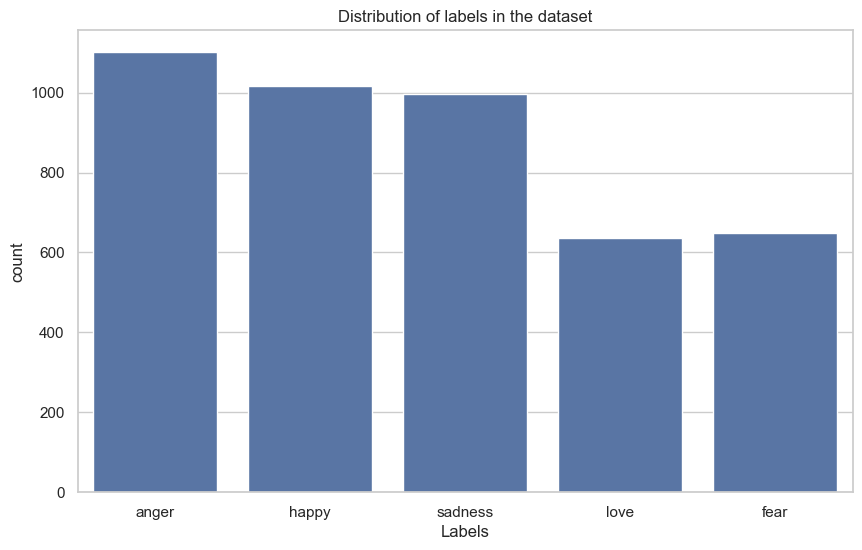

In [11]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.countplot(x=data["label"])
plt.title("Distribution of labels in the dataset")
plt.xlabel("Labels")
plt.show()

# Label Text Samples

In [12]:
for label in data['label'].unique():
    display(data[data['label']==label].head())

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
5,anger,"Dari sekian banyak thread yang aku baca, threa..."
8,anger,"Contoh mereka yg gemar menyudutkan, teriak pal..."


,label,tweet
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
6,happy,Sharing sama temen tuh emg guna bgt. Disaat lu...
12,happy,"sangat bersyukur bisa mendoakan kakeknya, Bung..."
18,happy,H-9. Mau ke bank rame bgt ampe antrian tempat ...


,label,tweet
7,sadness,Orang lain kalau pake ponco itu buat jas hujan...
9,sadness,Pulang udah H-4 lebaran dilema sekali. Seperti...
13,sadness,Sulit menerima kenyataan memang bahwa ada seba...
21,sadness,Separuh hati ini iri jika melihat seorang anak...
23,sadness,"dari mau tdr, tidur, sampe bgn tdr kok yaa kay..."


,label,tweet
16,love,Setiap kesempatan yg pernah hadir tuk dapat me...
24,love,kan kupeluk engkau erat2 hingga tak ada seoran...
35,love,Kenapa pasangan seringkali diibaratkan sebagai...
49,love,Ku rindu bisik mu di telingaku Seraya kau berk...
93,love,halohaa selamat siang Denise Udah pulang sekol...


,label,tweet
29,fear,Hari ini jadwal presentasi proker di LPPM karn...
31,fear,Drama kmarin sore : seharian puasa trus pas lg...
36,fear,"Ya tau kalo rasa sakit hati memamg sulit, tapi..."
42,fear,Apa hukumnya bermain musik stad? jelas HAROOOO...
53,fear,Nah.... Yg saya takutkan itu mas. Nanti di tum...


# Text Processing

In [13]:
proc_df = data.copy()

lower case every word

In [15]:
proc_df['lower'] = proc_df['tweet'].str.lower()

In [16]:
import re #regex

In [17]:
proc_df['no_link'] = proc_df['lower'].apply(lambda x: re.sub(r'http\S+', '', x))
proc_df['no_handle'] = proc_df['no_link'].apply(lambda x: re.sub(r'@\S+', '', x))
proc_df['clean_text'] = proc_df['no_handle'].apply(lambda x: re.sub(r'\[.*?\]', '', x))
proc_df['clean_text'] = proc_df['clean_text'].apply(lambda x: re.sub(r'\brt\b', '', x))
proc_df['clean_text'] = proc_df['clean_text'].apply(lambda x: re.sub(r'\w*[^\x00-\x7F]+\w*', '', x))

proc_df.head()

,label,tweet,lower,no_link,no_handle,clean_text
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...","soal jln jatibaru,polisi tdk bs gertak gubernu...","soal jln jatibaru,polisi tdk bs gertak gubernu...","soal jln jatibaru,polisi tdk bs gertak gubernu...","soal jln jatibaru,polisi tdk bs gertak gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...","sesama cewe lho (kayaknya), harusnya bisa lebi...","sesama cewe lho (kayaknya), harusnya bisa lebi...","sesama cewe lho (kayaknya), harusnya bisa lebi...","sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj. amad foto dari go...,kepingin gudeg mbarek bu hj. amad foto dari go...,kepingin gudeg mbarek bu hj. amad foto dari go...,kepingin gudeg mbarek bu hj. amad foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...","jln jatibaru,bagian dari wilayah tn abang.peng...","jln jatibaru,bagian dari wilayah tn abang.peng...","jln jatibaru,bagian dari wilayah tn abang.peng...","jln jatibaru,bagian dari wilayah tn abang.peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...","sharing pengalaman aja, kemarin jam 18.00 bata...","sharing pengalaman aja, kemarin jam 18.00 bata...","sharing pengalaman aja, kemarin jam 18.00 bata...","sharing pengalaman aja, kemarin jam 18.00 bata..."


remove stopwords

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Warge\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
stop_words = set(stopwords.words('indonesian'))
stop_words.update(["gw","lu","di","yg","gblk","gk","ya","gak","amp","ini","itu","kalo","utk","ga","dkk","gblok"])
proc_df['no_stopwords'] = proc_df['clean_text'].apply(
    lambda x: ' '.join([word for word in x.split() if word.strip() not in set(stop_words)])
)

In [38]:
def preprocessing(input):
    data = input.copy()
    data['lower'] = data['tweet'].str.lower()
    data['no_link'] = data['lower'].apply(lambda x: re.sub(r'http\S+', '', x))
    data['no_handle'] = data['no_link'].apply(lambda x: re.sub(r'@\S+', '', x))
    data['clean_text'] = data['no_handle'].apply(lambda x: re.sub(r'\[.*?\]', '', x))
    data['clean_text'] = data['clean_text'].apply(lambda x: re.sub(r'\brt\b', '', x))
    data['clean_text'] = data['clean_text'].apply(lambda x: re.sub(r'\w*[^\x00-\x7F]+\w*', '', x))
    data['no_stopwords'] = data['clean_text'].apply(
    lambda x: ' '.join([word for word in x.split() if word.strip() not in set(stop_words)])
)
    
    data.drop(['tweet','lower','no_link','no_handle','clean_text'],axis=1,inplace=True)
    return data

In [39]:
proc_df = preprocessing(data)

In [40]:
proc_df.head()

,label,no_stopwords
0,anger,"jln jatibaru,polisi tdk bs gertak gubernur .em..."
1,anger,"cewe lho (kayaknya), rasain sibuk jaga diri, r..."
2,happy,"kepingin gudeg mbarek bu hj. amad foto google,..."
3,anger,"jln jatibaru,bagian wilayah tn abang.pengatura..."
4,happy,"sharing pengalaman aja, kemarin jam 18.00 bata..."


# Length Visualization

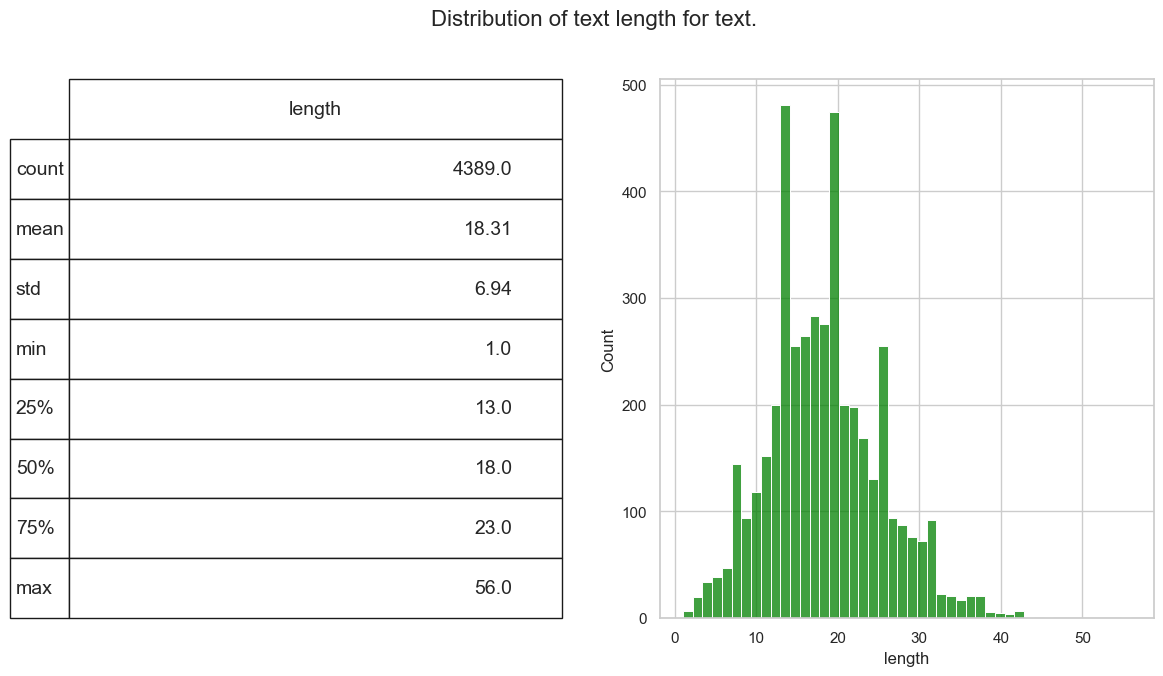

In [41]:
fig = plt.figure(figsize=(14,7))
proc_df['length'] = proc_df["no_stopwords"].str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(proc_df['length'], ax=ax1,color='green')
describe = proc_df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

# Word Clouds

In [42]:
from wordcloud import WordCloud

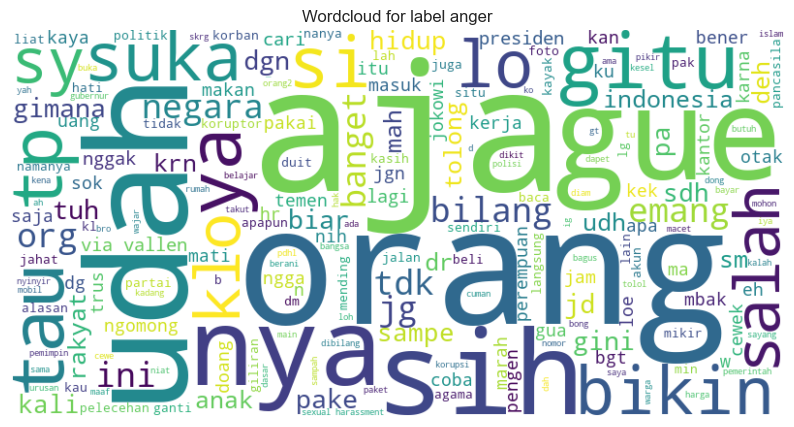

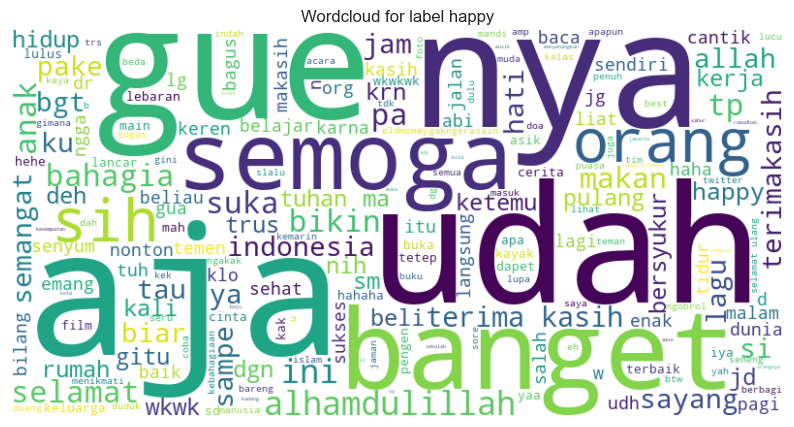

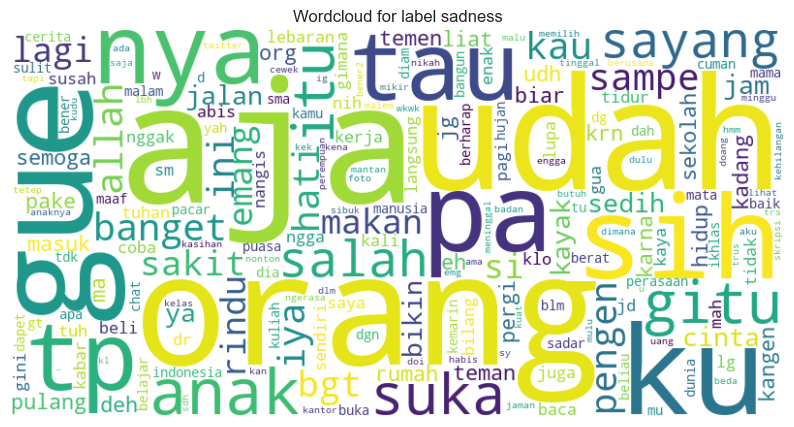

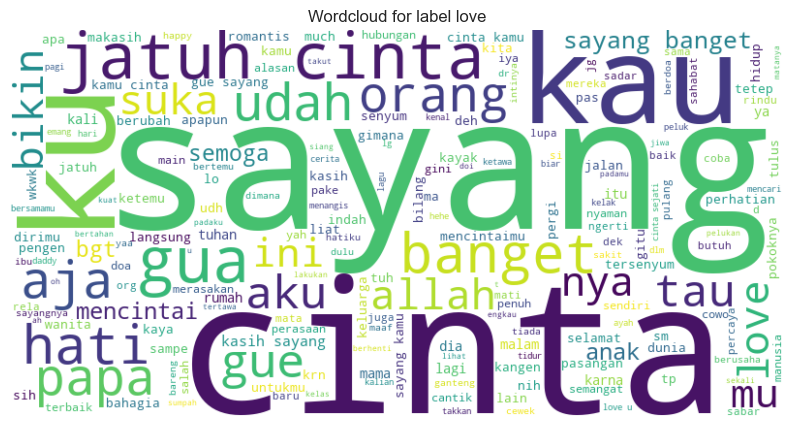

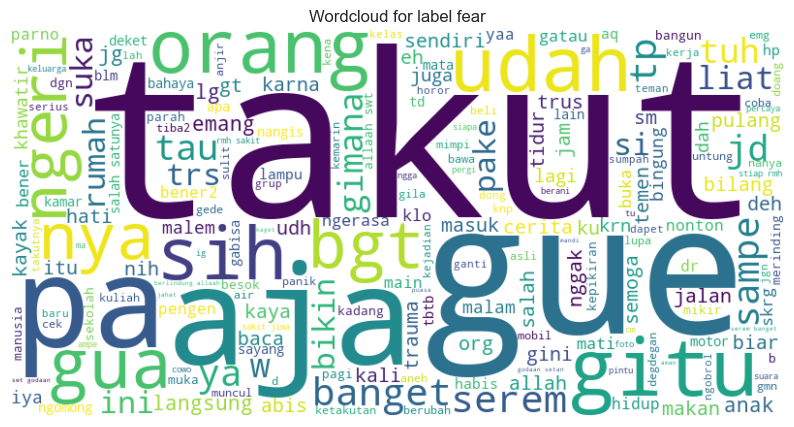

In [44]:
for label in proc_df['label'].unique():
    text = " ".join(proc_df[proc_df['label']==label]['no_stopwords'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud for label {label}")
    plt.show()

# Train Prep

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
train_df = data.copy()
train_df = preprocessing(train_df)
X = train_df.drop(['label'],axis=1)
y = train_df['label']

In [52]:
X.head()

,no_stopwords
0,"jln jatibaru,polisi tdk bs gertak gubernur .em..."
1,"cewe lho (kayaknya), rasain sibuk jaga diri, r..."
2,"kepingin gudeg mbarek bu hj. amad foto google,..."
3,"jln jatibaru,bagian wilayah tn abang.pengatura..."
4,"sharing pengalaman aja, kemarin jam 18.00 bata..."


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42,stratify=y)    
count_vect = CountVectorizer(ngram_range=(1, 3))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
X_train_counts = count_vect.fit_transform(X_train['no_stopwords'])
X_train_tfidf = transformer.fit_transform(X_train_counts)

X_test_counts = count_vect.transform(X_test['no_stopwords'])
X_test_tfidf = transformer.transform(X_test_counts)

print (X_train_tfidf.shape,X_test_tfidf.shape, y_train.shape, y_test.shape)

(3291, 119605) (1098, 119605) (3291,) (1098,)


In [54]:
X_train_tfidf.shape, X_train_tfidf.shape

((3291, 119605), (3291, 119605))

## Transform Function

In [55]:
def transform(data):
    data_counts = count_vect.transform(data['no_stopwords'])
    data_tfidf = transformer.transform(data_counts)
    return data_tfidf

In [56]:
from catboost import CatBoostClassifier

In [57]:
cb = CatBoostClassifier(task_type="GPU",devices="0:1" ,verbose=False)
cb.fit(X_train_tfidf, y_train)
preds = cb.predict(X_test_tfidf)
print(preds.shape)

(1098, 1)


In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       anger       0.52      0.65      0.58       275
        fear       0.77      0.59      0.67       162
       happy       0.60      0.52      0.56       253
        love       0.71      0.71      0.71       159
     sadness       0.44      0.45      0.44       249

    accuracy                           0.57      1098
   macro avg       0.61      0.58      0.59      1098
weighted avg       0.59      0.57      0.58      1098



# Feature Importance

In [60]:
print(cb.get_feature_importance(prettified=True))

       Feature Id  Importances
0          105758    17.695030
1           94976    11.606377
2           20328    11.076410
3           99394     2.967625
4           75815     2.566028
...           ...          ...
119600     119600     0.000000
119601     119601     0.000000
119602     119602     0.000000
119603     119603     0.000000
119604     119604     0.000000

[119605 rows x 2 columns]
